# Data - more metrics

In [8]:
import json
import matplotlib.pyplot as plt

train = json.load(open('Data/train.json'))
dev = json.load(open('Data/dev.json'))


Number of at least once nonsensically judged samples in training set: 229 out of 2280


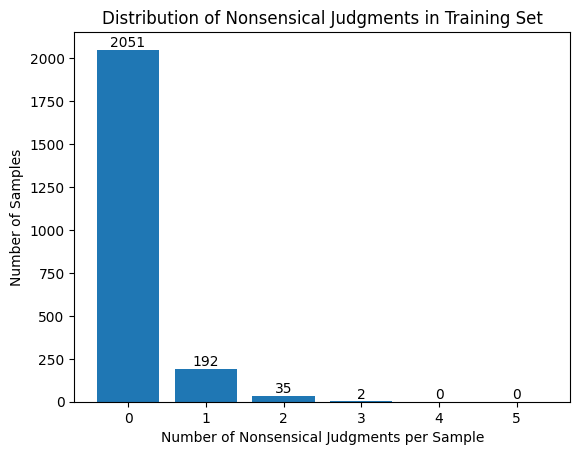

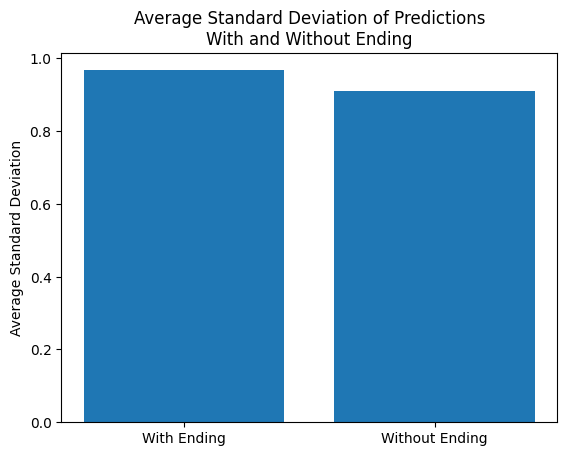

In [ ]:
with_ending_stdev = 0
without_ending_stdev = 0
nonsensical_count = [0,0,0,0,0,0]
for data in train:
    metrics = train[data]
    if metrics["ending"] == "":
        without_ending_stdev += metrics["stdev"]
    else:
        with_ending_stdev += metrics["stdev"]
    nonsensical_count[sum(metrics["nonsensical"])] += 1

print(f"Number of at least once nonsensically judged samples in training set: {sum(nonsensical_count[1:6])} out of {len(train)}")
plt.bar(["0","1","2","3","4","5"], nonsensical_count)
plt.bar_label(plt.gca().containers[0])
plt.xlabel("Number of Nonsensical Judgments per Sample")
plt.ylabel("Number of Samples")
plt.title("Distribution of Nonsensical Judgments in Training Set")
plt.show()  
print()
print()


plt.bar(["With Ending", "Without Ending"], [with_ending_stdev/(len(train)*2/3), without_ending_stdev/(len(train)/3)])
plt.ylabel("Average Standard Deviation")
plt.title("Average Standard Deviation of Predictions\nWith and Without Ending")
plt.show()


Number of at least once nonsensically judged samples in dev set: 42 out of 588


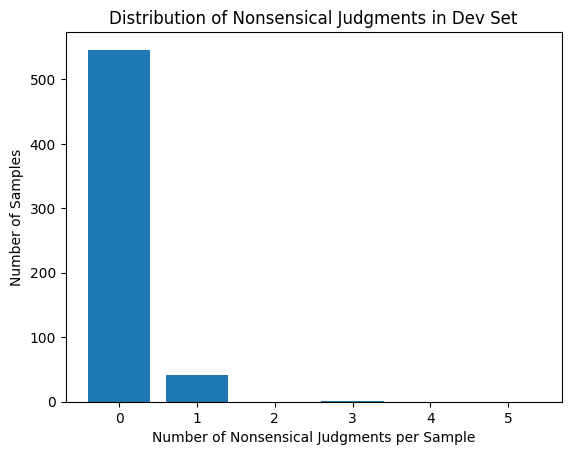

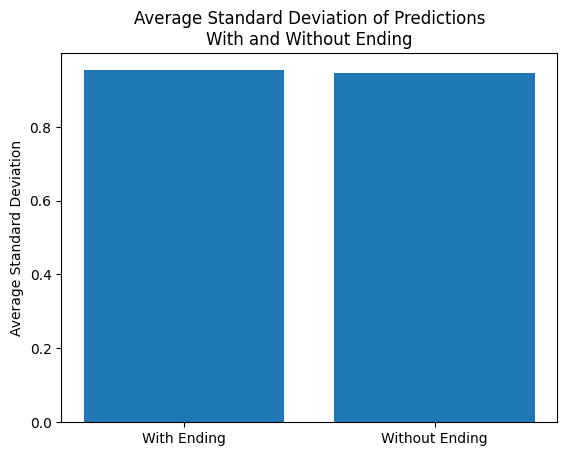

In [24]:
with_ending_stdev = 0
without_ending_stdev = 0
nonsensical_count = [0,0,0,0,0,0]
for data in dev:
    metrics = dev[data]
    if metrics["ending"] == "":
        without_ending_stdev += metrics["stdev"]
    else:
        with_ending_stdev += metrics["stdev"]
    nonsensical_count[sum(metrics["nonsensical"])] += 1

print(f"Number of at least once nonsensically judged samples in dev set: {sum(nonsensical_count[1:6])} out of {len(dev)}")
plt.bar(["0","1","2","3","4","5"], nonsensical_count)
plt.xlabel("Number of Nonsensical Judgments per Sample")
plt.ylabel("Number of Samples")
plt.title("Distribution of Nonsensical Judgments in Dev Set")
plt.show()  
print()
print()


plt.bar(["With Ending", "Without Ending"], [with_ending_stdev/(len(dev)*2/3), without_ending_stdev/(len(dev)/3)])
plt.ylabel("Average Standard Deviation")
plt.title("Average Standard Deviation of Predictions\nWith and Without Ending")
plt.show()